MAE:  627.307323239
Mean Train 601.92946384
Mean Test 542.181753284


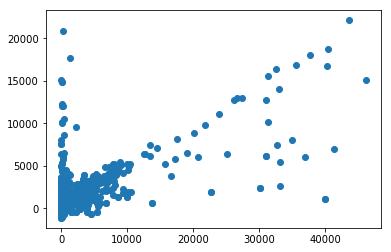

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Import Data from /r/politics The post title and the number of upvotes
data = pd.read_csv('data.csv',escapechar="\\")
data_sub = data[['title', 'ups']]

# split Data in to test and training sets
train_titles, test_titles, train_labels, test_labels = train_test_split(data_sub.title, 
                                                                        data_sub.ups, 
                                                                        test_size=0.20,
                                                                        random_state=42)
# Tokenize with specified ngram then apply tf-idf
tfidf = TfidfVectorizer(ngram_range=(1,3)).fit(train_titles, train_labels)
train_titles_tfidf = tfidf.transform(train_titles)
test_titles_tfidf = tfidf.transform(test_titles)

reg = Ridge()
reg.fit(train_titles_tfidf, train_labels)
test_predictions = reg.predict(test_titles_tfidf)

print('MAE: ', mean_absolute_error(test_predictions, test_labels))
print('Mean Train', np.mean(train_labels))
print('Mean Test', np.mean(test_labels))

plt.scatter(test_labels, test_predictions)
plt.show()